# Reject Inference 

Find Reasoncodes that are inRejected applied applicaitons and not in approved to find the ones that are only hard rejection codes


# KOLLA IGENOM SEN HUR JAG FILTERRAR N3 för jag får inte samma värden nu som jag fick första gången jag kollade!!!


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier , GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold , cross_validate, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score ,mean_squared_error
from sklearn.preprocessing import LabelEncoder
import os

import pandas as pd
import numpy as np


def getreasonCodes(df): 

    all_codes = []

    code_dict = {}

    for ne in range(1,6,1):

        var = 'reasoncode' + str(ne)
        unique = list(set(df[var]))

        code_dict[var] = unique

        all_codes.append(unique)


    all_all = []

    for l in all_codes:
        for ind in l:
            all_all.append(ind)

    unique = set(all_all)


    return  unique , code_dict


I need python version 3.9.17 in order to run 
import pymssql

In [2]:
from Preprocessing_Application import DataPreprocessor

server = 'reporting-db.nystartfinans.net'
database = 'reporting-db'
username = 'Andreas'
password = 'nCq8Sg@1lYnd(E'


path_MA = "/Users/andreasnilsson/Desktop/PD 2/DATA/Application MA Today.sql"
path_CO = "/Users/andreasnilsson/Desktop/PD 2/DATA/Application CO Today.sql"

preprocessor = DataPreprocessor(server, database, username, password)

main = preprocessor.fetch_data_from_sql(path_MA)
co = preprocessor.fetch_data_from_sql(path_CO)


/Users/andreasnilsson/Library/CloudStorage/OneDrive-Nstart/Skrivbordet/PD 2/Codes/Preprocessing_Application.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, self.conn)


In [43]:

main['Applicationtype'] = 0

co['Applicationtype'] = np.where((co['HasCoapp'] == 1) & (co['CoappSameAddress'] == 1), 2,
                                 np.where((co['HasCoapp'] == 1) & ((co['CoappSameAddress'] == 0) | (co['CoappSameAddress'] == -1)), 1,
                                          1))  ## Will assume missing is same address since its missing in the data and thats the worst case

df = pd.concat([main, co])  


In [44]:
df.EmploymentIncome

0         388
1         300
2         445
3        None
4         332
         ... 
14059     508
14060      85
14061    None
14062     316
14063     369
Name: EmploymentIncome, Length: 60520, dtype: object

In [45]:
df[df.U_applicationid == '8822878']

,U_applicationid,create_date,reasoncodes,sysdecgrpstd,systemdecstd,reasondescriptions,reasoncode1,reasondescription1,reasoncode2,reasondescription2,reasoncode3,reasondescription3,reasoncode4,reasondescription4,reasoncode5,reasondescription5,calculatedriskscore,calculatedpricesensivityindex,debttoincomeratio,kalpvalue,approvedloanamount,approvedloanterm,interestrate,interestrategroup,setupfee,pdscorenewcustomer,scoreversionnewcustomer,RowNumber,AccountNumber,ApplicationID,SSN_A,IsMainApplicant,HasCoapp,ApplicationScore,ReceivedDate,DisbursedDate,Amount,PaymentRemarks,CreditOfficer,SalesChannel,Product,Migrated,BrokerName,OriginalSalesChannel,BirthDate,Bookingtype,MaritalStatus,EmploymentType,HousingType,MonthlySalary,Referer,Campaign,SourceMedium,Keyword,NystartChannel,PNReceivedDate,NumberOfApplicants,Gender,CoappSameAddress,Kronofogden,CreditCardsNo,InstallmentLoansNo,UnsecuredLoansNo,LastPaymentRemarkDate1,TotalLoans,NystartBalance,TotalUnsecuredLoans,SSN,Inquiries12M,UCScore,IncomeYear,ActiveBusinessIncome,PassiveBusinessIncome,EmploymentIncome,CapitalIncome,CapitalDeficit,GeneralDeductions,ActiveBusinessDeficit,TotalIncome,IncomeYear2,ActiveBusinessIncome2,PassiveBusinessIncome2,EmploymentIncome2,CapitalIncome2,CapitalDeficit2,GeneralDeductions2,ActiveBusinessDeficit2,TotalIncome2,IncomeBeforeTax,IncomeBeforeTaxPrev,IncomeFromCapital,DeficitFromCapital,IncomeFromOwnBusiness,PaymentRemarksNo,PaymentRemarksAmount,LastPaymentRemarkDate,KFMPublicClaimsAmount,KFMPrivateClaimsAmount,KFMTotalAmount,KFMPublicClaimsNo,KFMPrivateClaimsNo,HouseTaxValue,HouseOwnershipPct,HouseOwnershipStatus,HouseOwnershipNo,BusinessInquiries,CreditCardsUtilizationRatio,HasMortgageLoan,HasCard,HasUnsecuredLoan,HasInstallmentLoan,IndebtednessRatio,AvgIndebtednessRatio12M,ActiveCreditAccounts,NewUnsecuredLoans12M,NewInstallmentLoans12M,NewCreditAccounts12M,NewMortgageLoans12M,TotalNewExMortgage12M,VolumeChange12MExMortgage,VolumeChange12MUnsecuredLoans,VolumeChange12MInstallmentLoans,VolumeChange12MCreditAccounts,VolumeChange12MMortgageLoans,AvgUtilizationRatio12M,VolumeUsed,NumberOfAccounts,NumberOfLenders,ApprovedCreditVolume,InstallmentLoansVolume,CreditAccountsVolume,UnsecuredLoansVolume,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,NumberOfCredits,NumberOfCreditors,ApprovedCardsLimit,NumberOfCreditCards,NumberOfBlancoLoans,SharedVolumeExMortgage,SharedVolume,NumberOfUnsecuredLoans,SharedVolumeUnsecuredLoans,NumberOfInstallmentLoans,SharedVolumeInstallmentLoans,NumberOfCreditAccounts,SharedVolumeCrerditAccounts,UtilizationRatio,CreditAccountOverdraft,NumberOfMortgageLoans,SharedVolumeMortgageLoans,SharedVolumeCreditCards,Applicationtype,jsonID,Date,import_key,SSN2,CountyCode,MunicipalityCode,PostalCode,GuardianAppointed,BlockCode,BlockCodeDate,CivilStatus,CivilStatusDate,TimeOnAddress,AddressType,Country,RowNum
9230,8822878,2023-10-23 16:40:19.823,{5DM},AP,ACC,"{""Medsökande har fler än 5 frågor inom 5 dagar.""}",5DM,Medsökande har fler än 5 frågor inom 5 dagar.,None,None,None,None,None,None,None,None,7,8,21,17988,460000,84,23.1,E,1995,3.88,PDscore_Newcustomer01,NaN,7959950,8822878,NaN,0,1,3.878741,2023-09-14,None,460000.0,0,Edvin,WEB,Nystartlånet,0,None,WEB,1963-01-29,,SINGLE,FULL,RENTED,36000.0,None,Missing,Missing,Missing,Undefined,2023-09-19,2,Female,1,0.0,6.0,1.0,1.0,None,240345.0,NaN,434676.0,6E667A221B6605B48CB6F0C77581D51E1A6085AF34A9FB...,8,0.098,2022,None,None,423,None,19,None,None,403,2021,None,None,414,None,17,None,None,398,403400.0,397800.0,NaN,19300.0,0.0,None,None,None,None,None,None,None,None,None,None,None,None,0,958,None,1.0,1.0,1.0,1.0283,0.8025,6,1,0,1,0,None,1.66,1.92,0.33,1.36,0.0,0.76,434676,9,8,441939,1809,167737,265130,None,None,9,8,175000,6,2.0,338061,345324,2,193230,1,0,6,0,95.85,Nej,None,None,0,2,65086c6c7556896233518f1a,2023-09-18,65086c6c7556896233518f1a2023-09-18,6301293988,12,82,26131,N,None,None,1,None,2022-11-01,None,None,1.0


In [46]:
df.Product.value_counts()

Product
Lån mot Lån              51381
Nystartlånet              8798
Förmedlare Skuldsaldo      341
Name: count, dtype: int64

In [47]:
df.Applicationtype.value_counts()

Applicationtype
0    46456
1    10911
2     3153
Name: count, dtype: int64

In [48]:
df.SalesChannel.value_counts()

SalesChannel
BROKER    52019
WEB        8501
Name: count, dtype: int64

In [49]:
#df = df[df.Product =='Lån mot Lån']

#df = df[df.Product =='Nystartlånet']    

In [50]:
df.Product.value_counts()

Product
Lån mot Lån              51381
Nystartlånet              8798
Förmedlare Skuldsaldo      341
Name: count, dtype: int64

In [51]:
LL = df[df.Product == 'Lån mot Lån']

In [52]:
pd.set_option('display.max_columns', None)

LL = LL[LL.create_date >= '2023-08-01']
LL =  LL[LL.UCScore >= 0]




In [53]:
LL

,U_applicationid,create_date,reasoncodes,sysdecgrpstd,systemdecstd,reasondescriptions,reasoncode1,reasondescription1,reasoncode2,reasondescription2,reasoncode3,reasondescription3,reasoncode4,reasondescription4,reasoncode5,reasondescription5,calculatedriskscore,calculatedpricesensivityindex,debttoincomeratio,kalpvalue,approvedloanamount,approvedloanterm,interestrate,interestrategroup,setupfee,pdscorenewcustomer,scoreversionnewcustomer,RowNumber,AccountNumber,ApplicationID,SSN_A,IsMainApplicant,HasCoapp,ApplicationScore,ReceivedDate,DisbursedDate,Amount,PaymentRemarks,CreditOfficer,SalesChannel,Product,Migrated,BrokerName,OriginalSalesChannel,BirthDate,Bookingtype,MaritalStatus,EmploymentType,HousingType,MonthlySalary,Referer,Campaign,SourceMedium,Keyword,NystartChannel,PNReceivedDate,NumberOfApplicants,Gender,CoappSameAddress,Kronofogden,CreditCardsNo,InstallmentLoansNo,UnsecuredLoansNo,LastPaymentRemarkDate1,TotalLoans,NystartBalance,TotalUnsecuredLoans,SSN,Inquiries12M,UCScore,IncomeYear,ActiveBusinessIncome,PassiveBusinessIncome,EmploymentIncome,CapitalIncome,CapitalDeficit,GeneralDeductions,ActiveBusinessDeficit,TotalIncome,IncomeYear2,ActiveBusinessIncome2,PassiveBusinessIncome2,EmploymentIncome2,CapitalIncome2,CapitalDeficit2,GeneralDeductions2,ActiveBusinessDeficit2,TotalIncome2,IncomeBeforeTax,IncomeBeforeTaxPrev,IncomeFromCapital,DeficitFromCapital,IncomeFromOwnBusiness,PaymentRemarksNo,PaymentRemarksAmount,LastPaymentRemarkDate,KFMPublicClaimsAmount,KFMPrivateClaimsAmount,KFMTotalAmount,KFMPublicClaimsNo,KFMPrivateClaimsNo,HouseTaxValue,HouseOwnershipPct,HouseOwnershipStatus,HouseOwnershipNo,BusinessInquiries,CreditCardsUtilizationRatio,HasMortgageLoan,HasCard,HasUnsecuredLoan,HasInstallmentLoan,IndebtednessRatio,AvgIndebtednessRatio12M,ActiveCreditAccounts,NewUnsecuredLoans12M,NewInstallmentLoans12M,NewCreditAccounts12M,NewMortgageLoans12M,TotalNewExMortgage12M,VolumeChange12MExMortgage,VolumeChange12MUnsecuredLoans,VolumeChange12MInstallmentLoans,VolumeChange12MCreditAccounts,VolumeChange12MMortgageLoans,AvgUtilizationRatio12M,VolumeUsed,NumberOfAccounts,NumberOfLenders,ApprovedCreditVolume,InstallmentLoansVolume,CreditAccountsVolume,UnsecuredLoansVolume,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,NumberOfCredits,NumberOfCreditors,ApprovedCardsLimit,NumberOfCreditCards,NumberOfBlancoLoans,SharedVolumeExMortgage,SharedVolume,NumberOfUnsecuredLoans,SharedVolumeUnsecuredLoans,NumberOfInstallmentLoans,SharedVolumeInstallmentLoans,NumberOfCreditAccounts,SharedVolumeCrerditAccounts,UtilizationRatio,CreditAccountOverdraft,NumberOfMortgageLoans,SharedVolumeMortgageLoans,SharedVolumeCreditCards,Applicationtype,jsonID,Date,import_key,SSN2,CountyCode,MunicipalityCode,PostalCode,GuardianAppointed,BlockCode,BlockCodeDate,CivilStatus,CivilStatusDate,TimeOnAddress,AddressType,Country,RowNum
0,8770408,2023-08-01 06:00:54.737,{},AP,ACC,{},None,None,None,None,None,None,None,None,None,None,7,8,34,2065,150000,180,22.65,D,995,2.52,PDscore_Newcustomer01,1.0,7941958,8770408,647AE659EA9EEA58A6AF3E0C9806039A6E28146B81EFBC...,1,0,2.517761,2023-08-01,None,150000.0,1,Radin,BROKER,Lån mot Lån,0,Axo,BROKER,1975-09-13,,SINGLE,FULL,RENTED,29500.0,None,Missing,Missing,Missing,Undefined,None,1,Female,None,0.0,NaN,1.0,3.0,2020-10-19,120147.0,NaN,120147.0,647AE659EA9EEA58A6AF3E0C9806039A6E28146B81EFBC...,42,0.121,2022,None,None,388,None,13,None,None,374,2021,None,None,329,None,9,None,None,320,374200.0,319900.0,NaN,13300.0,0.0,1,0,2020-10-19,None,None,None,None,None,None,None,None,None,0,0,None,0.0,1.0,1.0,0.3100,0.2903,0,1,1,0,0,None,0.35,0.20,1.00,0.00,0.0,NaN,120147,4,3,120147,13017,None,107130,None,None,4,3,None,None,3.0,120147,120147,3,0,1,0,None,None,NaN,None,None,None,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8771045,2023-08-01 12:45:01.707,{},AP,ACC,{},None,None,None,None,None,None,None,None,None,None,7,8,26,-1650,130000,60,16,B,495,1.15,PDscore_Newcustomer01,1.0,7942030,8771045,66C66C79430054C1F3B8119C1

In [54]:
LL = LL[['ApplicationID','BirthDate','Inquiries12M','Amount','BrokerName','UCScore','create_date']]

In [55]:
import pandas as pd
import numpy as np

# Ensure LL is a standalone DataFrame
LL = LL.copy()

# Get today's date without time
today = pd.Timestamp('today').floor('D')

# Convert 'BirthDate' to datetime and calculate initial 'age'
LL['BirthDate'] = pd.to_datetime(LL['BirthDate'])
LL['age'] = today.year - LL['BirthDate'].dt.year

# Adjust for cases where the birthdate hasn't occurred this year yet
LL.loc[:, 'age'] = np.where(
    (today.month < LL['BirthDate'].dt.month) |
    ((today.month == LL['BirthDate'].dt.month) & (today.day < LL['BirthDate'].dt.day)),
    LL['age'] - 1,
    LL['age']
)


In [56]:
len(set(LL.ApplicationID))

41142

In [57]:
LL

,ApplicationID,BirthDate,Inquiries12M,Amount,BrokerName,UCScore,create_date,age
0,8770408,1975-09-13,42,150000.0,Axo,0.121,2023-08-01 06:00:54.737,48
1,8771045,1991-07-03,24,130000.0,Enklare,0.089,2023-08-01 12:45:01.707,32
2,8771248,1972-07-04,10,250000.0,Reducero,0.062,2023-08-01 14:18:10.493,51
4,8771282,1996-04-04,7,120000.0,Advisa,0.165,2023-08-01 14:27:28.940,27
6,8771046,1976-06-30,29,200000.0,Enklare,0.488,2023-08-01 12:45:25.367,47
...,...,...,...,...,...,...,...,...
13962,8832207,1974-03-05,12,500000.0,Reducero,0.071,2023-09-25 14:29:09.977,49
13965,8845054,2002-06-09,2,35000.0,Enklare,0.047,2023-10-05 16:50:24.920,21
13966,8850529,2000-11-24,13,110000.0,Enklare,0.137,2023-10-12 14:53:09.990,22
13967,8850554,1994-12-04,4,100000.0,Advisa,0.084,2023-10-11 16:03:29.057,28


In [58]:
# Convert 'age' and 'Inquiries12M' to numeric types if they are not already
LL['age'] = pd.to_numeric(LL['age'], errors='coerce')
LL['Inquiries12M'] = pd.to_numeric(LL['Inquiries12M'], errors='coerce')

LL


,ApplicationID,BirthDate,Inquiries12M,Amount,BrokerName,UCScore,create_date,age
0,8770408,1975-09-13,42.0,150000.0,Axo,0.121,2023-08-01 06:00:54.737,48
1,8771045,1991-07-03,24.0,130000.0,Enklare,0.089,2023-08-01 12:45:01.707,32
2,8771248,1972-07-04,10.0,250000.0,Reducero,0.062,2023-08-01 14:18:10.493,51
4,8771282,1996-04-04,7.0,120000.0,Advisa,0.165,2023-08-01 14:27:28.940,27
6,8771046,1976-06-30,29.0,200000.0,Enklare,0.488,2023-08-01 12:45:25.367,47
...,...,...,...,...,...,...,...,...
13962,8832207,1974-03-05,12.0,500000.0,Reducero,0.071,2023-09-25 14:29:09.977,49
13965,8845054,2002-06-09,2.0,35000.0,Enklare,0.047,2023-10-05 16:50:24.920,21
13966,8850529,2000-11-24,13.0,110000.0,Enklare,0.137,2023-10-12 14:53:09.990,22
13967,8850554,1994-12-04,4.0,100000.0,Advisa,0.084,2023-10-11 16:03:29.057,28


In [59]:
print(LL['age'].isna().sum())
print(LL['Inquiries12M'].isna().sum())


0
22


In [60]:
print(LL['age'].dtype)
print(LL['Inquiries12M'].dtype)

filtered_LL = LL[(LL['age'] < 27) | (LL['Inquiries12M'] > 24)]

len(filtered_LL)/3

int32
float64


2784.6666666666665

In [61]:
filtered_LL

,ApplicationID,BirthDate,Inquiries12M,Amount,BrokerName,UCScore,create_date,age
0,8770408,1975-09-13,42.0,150000.0,Axo,0.121,2023-08-01 06:00:54.737,48
6,8771046,1976-06-30,29.0,200000.0,Enklare,0.488,2023-08-01 12:45:25.367,47
7,8771496,1983-06-23,31.0,30000.0,Likvidum,0.375,2023-08-01 16:20:12.787,40
9,8771167,1998-03-14,8.0,200000.0,Zmarta,0.102,2023-08-01 13:39:39.997,25
10,8771302,1998-06-20,39.0,150000.0,Advisa,0.135,2023-08-01 14:36:42.950,25
...,...,...,...,...,...,...,...,...
13382,8779400,1998-08-15,8.0,500000.0,KOLL,0.096,2023-08-08 16:56:09.393,25
13384,8780476,1967-07-22,25.0,160000.0,Enklare,0.298,2023-08-09 13:45:08.463,56
13393,8783585,1995-05-17,41.0,155000.0,Lendo,0.174,2023-08-12 10:26:08.987,28
13965,8845054,2002-06-09,2.0,35000.0,Enklare,0.047,2023-10-05 16:50:24.920,21


In [42]:
LL[(LL['age'] < 27) & (LL['Inquiries12M'] < 25)] #.head(60)

,ApplicationID,BirthDate,Inquiries12M,Amount,BrokerName,UCScore,create_date,age
9,8771167,1998-03-14,8.0,200000.0,Zmarta,0.102,2023-08-01 13:39:39.997,25
12,8770756,1997-04-09,7.0,41000.0,Svensk Låneförmedling,0.180,2023-08-02 15:51:00.843,26
17,8770888,1999-04-07,12.0,300000.0,Enklare,0.077,2023-08-01 11:39:51.367,24
22,8772191,2001-05-21,17.0,110000.0,Lendo,0.039,2023-08-02 10:03:23.410,22
23,8772231,1997-08-04,23.0,50000.0,Advisa,0.257,2023-08-02 10:26:10.800,26
...,...,...,...,...,...,...,...,...
13318,8809784,2003-12-13,9.0,50000.0,Lendo,0.166,2023-09-03 15:16:01.020,19
13341,8821162,1999-06-05,14.0,275000.0,Axo,0.578,2023-09-13 15:10:20.870,24
13382,8779400,1998-08-15,8.0,500000.0,KOLL,0.096,2023-08-08 16:56:09.393,25
13965,8845054,2002-06-09,2.0,35000.0,Enklare,0.047,2023-10-05 16:50:24.920,21


In [74]:
LL[(LL['age'] < 27) & (LL['Inquiries12M'] > 25)]

,ApplicationID,BirthDate,Inquiries12M,Amount,BrokerName,UCScore,create_date,age
0,8771282,1996-04-04,7.0,120000.0,Advisa,0.165,2023-08-01 14:27:28.940,27
5,8771167,1998-03-14,8.0,200000.0,Zmarta,0.102,2023-08-01 13:39:39.997,25
7,8771376,1990-05-21,16.0,45000.0,Advisa,0.298,2023-08-03 09:53:15.213,33
8,8770756,1997-04-09,7.0,41000.0,Svensk Låneförmedling,0.180,2023-08-02 15:51:00.843,26
9,8771594,1981-05-15,19.0,82000.0,Likvidum,0.373,2023-08-02 09:16:54.723,42
...,...,...,...,...,...,...,...,...
13981,8820101,1974-12-30,10.0,250000.0,Axo,0.359,2023-09-13 17:34:01.617,48
13989,8840180,1968-06-23,1.0,300000.0,Lendo,0.002,2023-10-02 04:54:02.570,55
13991,8846097,1995-04-10,7.0,60000.0,Reducero,0.177,2023-10-06 11:35:46.957,28
13992,8851031,1967-02-07,2.0,110000.0,Likvidum,0.006,2023-10-12 15:15:07.173,56


In [ ]:
| (LL['Inquiries12M'] < 25)

In [56]:
LL.to_excel('LL_Age_Calculated.xlsx', index=False)

In [11]:
df_Broker = df[df.SalesChannel == 'BROKER']
df_Web = df[df.SalesChannel != 'BROKER']

In [12]:
df_Broker.sysdecgrpstd.value_counts()

sysdecgrpstd
RF    38420
AP    13599
Name: count, dtype: int64

In [13]:
df_Web.sysdecgrpstd.value_counts()

sysdecgrpstd
AP    7393
RF    1108
Name: count, dtype: int64

In [14]:
df.Product.value_counts()

Product
Lån mot Lån              51381
Nystartlånet              8798
Förmedlare Skuldsaldo      341
Name: count, dtype: int64

In [15]:
AP = df_Broker[df_Broker.sysdecgrpstd == 'AP']
RF =df_Broker[df_Broker.sysdecgrpstd == 'RF']

AP_code_listan, AP_dicten = getreasonCodes(AP)
RF_code_listan, RF_dicten = getreasonCodes(RF)


In [16]:
AP_code_listan

{'1AA',
 '1KA',
 '1UA',
 '2AS',
 '2KA',
 '2US',
 '5DM',
 '5DS',
 'ADR',
 'BEX',
 'BLS',
 'BWM',
 'BWS',
 'E1S',
 'E2S',
 'IDH',
 'INK',
 'INM',
 'MSO',
 'None',
 'O30',
 'ONI',
 'ONM',
 'RK3',
 'S30',
 'SSB',
 'TRM'}

In [17]:
#Only RF
RF_hard_codes = RF_code_listan - AP_code_listan 

# Only AP
AP_code_listan - RF_code_listan 

# Intersection
RF_code_listan & AP_code_listan 

{'1AA',
 '1UA',
 '2AS',
 '2KA',
 '2US',
 '5DM',
 '5DS',
 'ADR',
 'BEX',
 'BLS',
 'E1S',
 'E2S',
 'IDH',
 'INK',
 'INM',
 'MSO',
 'None',
 'O30',
 'ONI',
 'ONM',
 'RK3',
 'S30',
 'SSB',
 'TRM'}

## Analyse RF Hard Codes, what do they mean?


### sånna jag vill ifrågasätta

DEL  regel som inte implementerades pga risk men för konverteringsgrad. analysera denna!!!


EEK , ensamsökande, gammalt kalpvärde,  vi kanske inte vill bjuda på den för vi tar betalt för allt vi budar på

EES , ensamsökande, debt ratio > 170 ,  vi kanske inte vill bjuda på den för vi tar betalt för allt vi budar på


nästan som att vi borde implementera den på wewbb också 5FS

In [18]:
RF_hard_codes


{'5AM',
 '5AS',
 '5FM',
 '5FS',
 'B2O',
 'B2S',
 'DEL',
 'DEM',
 'EEK',
 'EES',
 'GSL',
 'IDM',
 'INS',
 'NYM',
 'NYS',
 'RC3',
 'SSU',
 'TAX',
 'TRS',
 'UCM',
 'UCS'}

## RC3 Eller inte av de andra Hårda

In [19]:

# # Your initial filtering using a regex
filtered_RC3 = RF[RF['reasoncodes'].str.contains('|'.join(['RK3', 'RC3']), na=False)]  # ,'DEL'
filtered_RC3


,U_applicationid,create_date,reasoncodes,sysdecgrpstd,systemdecstd,reasondescriptions,reasoncode1,reasondescription1,reasoncode2,reasondescription2,...,PostalCode,GuardianAppointed,BlockCode,BlockCodeDate,CivilStatus,CivilStatusDate,TimeOnAddress,AddressType,Country,RowNum
360,8783375,2023-08-14 10:06:50.583,"{RC3,RK3}",RF,REJ,"{""Riskklass N3, medsökande krävs"",""Riskklass N...",RC3,"Riskklass N3, medsökande krävs",RK3,"Riskklass N3, medsökande krävs",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1007,8820126,2023-09-13 11:13:46.493,"{BLS,RC3,RK3}",RF,REJ,"{""Sökande har blank frågeställare senaste 6 må...",BLS,Sökande har blank frågeställare senaste 6 måna...,RC3,"Riskklass N3, medsökande krävs",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1044,8821432,2023-09-27 15:17:50.060,"{BLS,RC3,RK3}",RF,REJ,"{""Sökande har blank frågeställare senaste 6 må...",BLS,Sökande har blank frågeställare senaste 6 måna...,RC3,"Riskklass N3, medsökande krävs",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1045,8821432,2023-09-27 15:17:50.060,"{BLS,RC3,RK3}",RF,REJ,"{""Sökande har blank frågeställare senaste 6 må...",BLS,Sökande har blank frågeställare senaste 6 måna...,RC3,"Riskklass N3, medsökande krävs",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1428,8825123,2023-09-19 13:38:38.517,"{RC3,RK3}",RF,REJ,"{""Riskklass N3, medsökande krävs"",""Riskklass N...",RC3,"Riskklass N3, medsökande krävs",RK3,"Riskklass N3, medsökande krävs",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13533,8709727,2023-06-09 10:59:52.903,"{ADR,INK,E2S,B2O,RC3,RK3}",RF,REJ,"{""De två sökande bor inte på samma adress enli...",ADR,De två sökande bor inte på samma adress enligt...,INK,Sökandes uppgivna inkomst mer än 120 % av UC i...,...,12245,N,None,None,1,None,2022-11-01,None,None,1.0
13686,8590012,2023-02-28 11:44:01.390,"{INM,SSB,S30,DEM,B2S,RC3,RK3}",RF,REJ,"{""Medsökandes uppgivna inkomst mer än 120 % av...",INM,Medsökandes uppgivna inkomst mer än 120 % av U...,SSB,Båda sökande har skuldsaldo.,...,59531,N,None,None,7,None,2022-11-01,None,None,1.0
13722,8606637,2023-03-14 10:31:06.447,"{ADR,INM,O30,RC3,RK3}",RF,REJ,"{""De två sökande bor inte på samma adress enli...",ADR,De två sökande bor inte på samma adress enligt...,INM,Medsökandes uppgivna inkomst mer än 120 % av U...,...,63353,N,None,None,1,None,2022-11-01,None,None,1.0
13723,8606760,2023-03-14 11:19:52.850,"{ADR,INK,INM,DEM,B2O,RC3,RK3}",RF,REJ,"{""De två sökande bor inte på samma adress enli...",ADR,De två sökande bor inte på samma adress enligt...,INK,Sökandes uppgivna inkomst mer än 120 % av UC i...,...,78441,N,None,None,1,None,2022-11-01,None,None,1.0


In [20]:

filtered_RC3_exclude_hard = filtered_RC3.copy()

for code in RF_hard_codes:
    if code in ['RK3', 'RC3']:  # ,'DEL'
        continue
    filtered_RC3_exclude_hard = filtered_RC3_exclude_hard[~filtered_RC3_exclude_hard['reasoncodes'].str.contains(code, na=False)]


In [21]:
BROKER_N3_REJECTS = filtered_RC3_exclude_hard 



In [22]:
pd.set_option('display.max_columns', None) 
BROKER_N3_REJECTS.head(30)

,U_applicationid,create_date,reasoncodes,sysdecgrpstd,systemdecstd,reasondescriptions,reasoncode1,reasondescription1,reasoncode2,reasondescription2,reasoncode3,reasondescription3,reasoncode4,reasondescription4,reasoncode5,reasondescription5,calculatedriskscore,calculatedpricesensivityindex,debttoincomeratio,kalpvalue,approvedloanamount,approvedloanterm,interestrate,interestrategroup,setupfee,pdscorenewcustomer,scoreversionnewcustomer,RowNumber,AccountNumber,ApplicationID,SSN_A,IsMainApplicant,HasCoapp,ApplicationScore,ReceivedDate,DisbursedDate,Amount,PaymentRemarks,CreditOfficer,SalesChannel,Product,Migrated,BrokerName,OriginalSalesChannel,BirthDate,Bookingtype,MaritalStatus,EmploymentType,HousingType,MonthlySalary,Referer,Campaign,SourceMedium,Keyword,NystartChannel,PNReceivedDate,NumberOfApplicants,Gender,CoappSameAddress,Kronofogden,CreditCardsNo,InstallmentLoansNo,UnsecuredLoansNo,LastPaymentRemarkDate1,TotalLoans,NystartBalance,TotalUnsecuredLoans,SSN,Inquiries12M,UCScore,IncomeYear,ActiveBusinessIncome,PassiveBusinessIncome,EmploymentIncome,CapitalIncome,CapitalDeficit,GeneralDeductions,ActiveBusinessDeficit,TotalIncome,IncomeYear2,ActiveBusinessIncome2,PassiveBusinessIncome2,EmploymentIncome2,CapitalIncome2,CapitalDeficit2,GeneralDeductions2,ActiveBusinessDeficit2,TotalIncome2,IncomeBeforeTax,IncomeBeforeTaxPrev,IncomeFromCapital,DeficitFromCapital,IncomeFromOwnBusiness,PaymentRemarksNo,PaymentRemarksAmount,LastPaymentRemarkDate,KFMPublicClaimsAmount,KFMPrivateClaimsAmount,KFMTotalAmount,KFMPublicClaimsNo,KFMPrivateClaimsNo,HouseTaxValue,HouseOwnershipPct,HouseOwnershipStatus,HouseOwnershipNo,BusinessInquiries,CreditCardsUtilizationRatio,HasMortgageLoan,HasCard,HasUnsecuredLoan,HasInstallmentLoan,IndebtednessRatio,AvgIndebtednessRatio12M,ActiveCreditAccounts,NewUnsecuredLoans12M,NewInstallmentLoans12M,NewCreditAccounts12M,NewMortgageLoans12M,TotalNewExMortgage12M,VolumeChange12MExMortgage,VolumeChange12MUnsecuredLoans,VolumeChange12MInstallmentLoans,VolumeChange12MCreditAccounts,VolumeChange12MMortgageLoans,AvgUtilizationRatio12M,VolumeUsed,NumberOfAccounts,NumberOfLenders,ApprovedCreditVolume,InstallmentLoansVolume,CreditAccountsVolume,UnsecuredLoansVolume,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,NumberOfCredits,NumberOfCreditors,ApprovedCardsLimit,NumberOfCreditCards,NumberOfBlancoLoans,SharedVolumeExMortgage,SharedVolume,NumberOfUnsecuredLoans,SharedVolumeUnsecuredLoans,NumberOfInstallmentLoans,SharedVolumeInstallmentLoans,NumberOfCreditAccounts,SharedVolumeCrerditAccounts,UtilizationRatio,CreditAccountOverdraft,NumberOfMortgageLoans,SharedVolumeMortgageLoans,SharedVolumeCreditCards,Applicationtype,jsonID,Date,import_key,SSN2,CountyCode,MunicipalityCode,PostalCode,GuardianAppointed,BlockCode,BlockCodeDate,CivilStatus,CivilStatusDate,TimeOnAddress,AddressType,Country,RowNum
360,8783375,2023-08-14 10:06:50.583,"{RC3,RK3}",RF,REJ,"{""Riskklass N3, medsökande krävs"",""Riskklass N...",RC3,"Riskklass N3, medsökande krävs",RK3,"Riskklass N3, medsökande krävs",None,None,None,None,None,None,7,8,58,2916,60000,144,22.65,D,995,5.41,PDscore_Newcustomer01,1.0,7946411,8783375,EA007BCAF77BAD1046B121BFE02074DA14A828EBD082EF...,1,0,5.406944,2023-08-11,None,60000.0,0,Axel,BROKER,Lån mot Lån,0,Enklare,BROKER,2001-06-23,,SINGLE,FULL,LIVEIN,33000.0,None,Missing,Missing,Missing,Undefined,None,1,Female,None,0.0,2.0,NaN,2.0,None,231582.0,NaN,231582.0,EA007BCAF77BAD1046B121BFE02074DA14A828EBD082EF...,12,0.211,2022,None,None,428,None,9,None,None,419,2021,None,None,364,None,0,None,None,363,418900.0,363200.0,NaN,8500.0,0.0,None,None,None,None,None,None,None,None,None,None,None,None,0,835,None,1.0,1.0,0.0,0.5418,0.4007,1,2,0,2,0,None,1.00,0.74,0.00,1.00,0.00,0.08,231582,4,3,237509,None,30000,201582,None,None,4,3,35927,2,2.0,231582,237509,2,0,None,None,2,0,83.50,Nej,None,None,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1007,8820126,2023-09-13 11:13:46.493,"{BLS,RC3,RK3}",RF,REJ,"{""Sökande har blank frågestäl

In [23]:
print(len(filtered_RC3_exclude_hard))
len(filtered_RC3_exclude_hard)/len(filtered_RC3)

2088


0.5532591414944356

## Broker analysis done

## Start Web analysis

In S1 there is no Hard code for excluding N3, they will just say pending in the system 

Therefor I can exclude all other hardcodes and only look at those that are N3 of system approved


In [24]:
AP = df_Web[df_Web.sysdecgrpstd == 'AP']
RF =df_Web[df_Web.sysdecgrpstd == 'RF']

AP_code_listan, AP_dicten = getreasonCodes(AP)
RF_code_listan, RF_dicten = getreasonCodes(RF)


In [25]:
#Only RF
RF_hard_codes = RF_code_listan - AP_code_listan 

# Only AP
AP_code_listan - RF_code_listan 

# Intersection
RF_code_listan & AP_code_listan 

{'5DM', '5DS', 'ADR', 'BLS', 'IDH', 'INK', 'INM', 'MSO', 'None', 'RK3'}

In [26]:

# # Your initial filtering using a regex
filtered_RC3 = AP[AP['reasoncodes'].str.contains('|'.join(['RK3', 'RC3']), na=False)]  # ,'DEL'
filtered_RC3


,U_applicationid,create_date,reasoncodes,sysdecgrpstd,systemdecstd,reasondescriptions,reasoncode1,reasondescription1,reasoncode2,reasondescription2,reasoncode3,reasondescription3,reasoncode4,reasondescription4,reasoncode5,reasondescription5,calculatedriskscore,calculatedpricesensivityindex,debttoincomeratio,kalpvalue,approvedloanamount,approvedloanterm,interestrate,interestrategroup,setupfee,pdscorenewcustomer,scoreversionnewcustomer,RowNumber,AccountNumber,ApplicationID,SSN_A,IsMainApplicant,HasCoapp,ApplicationScore,ReceivedDate,DisbursedDate,Amount,PaymentRemarks,CreditOfficer,SalesChannel,Product,Migrated,BrokerName,OriginalSalesChannel,BirthDate,Bookingtype,MaritalStatus,EmploymentType,HousingType,MonthlySalary,Referer,Campaign,SourceMedium,Keyword,NystartChannel,PNReceivedDate,NumberOfApplicants,Gender,CoappSameAddress,Kronofogden,CreditCardsNo,InstallmentLoansNo,UnsecuredLoansNo,LastPaymentRemarkDate1,TotalLoans,NystartBalance,TotalUnsecuredLoans,SSN,Inquiries12M,UCScore,IncomeYear,ActiveBusinessIncome,PassiveBusinessIncome,EmploymentIncome,CapitalIncome,CapitalDeficit,GeneralDeductions,ActiveBusinessDeficit,TotalIncome,IncomeYear2,ActiveBusinessIncome2,PassiveBusinessIncome2,EmploymentIncome2,CapitalIncome2,CapitalDeficit2,GeneralDeductions2,ActiveBusinessDeficit2,TotalIncome2,IncomeBeforeTax,IncomeBeforeTaxPrev,IncomeFromCapital,DeficitFromCapital,IncomeFromOwnBusiness,PaymentRemarksNo,PaymentRemarksAmount,LastPaymentRemarkDate,KFMPublicClaimsAmount,KFMPrivateClaimsAmount,KFMTotalAmount,KFMPublicClaimsNo,KFMPrivateClaimsNo,HouseTaxValue,HouseOwnershipPct,HouseOwnershipStatus,HouseOwnershipNo,BusinessInquiries,CreditCardsUtilizationRatio,HasMortgageLoan,HasCard,HasUnsecuredLoan,HasInstallmentLoan,IndebtednessRatio,AvgIndebtednessRatio12M,ActiveCreditAccounts,NewUnsecuredLoans12M,NewInstallmentLoans12M,NewCreditAccounts12M,NewMortgageLoans12M,TotalNewExMortgage12M,VolumeChange12MExMortgage,VolumeChange12MUnsecuredLoans,VolumeChange12MInstallmentLoans,VolumeChange12MCreditAccounts,VolumeChange12MMortgageLoans,AvgUtilizationRatio12M,VolumeUsed,NumberOfAccounts,NumberOfLenders,ApprovedCreditVolume,InstallmentLoansVolume,CreditAccountsVolume,UnsecuredLoansVolume,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,NumberOfCredits,NumberOfCreditors,ApprovedCardsLimit,NumberOfCreditCards,NumberOfBlancoLoans,SharedVolumeExMortgage,SharedVolume,NumberOfUnsecuredLoans,SharedVolumeUnsecuredLoans,NumberOfInstallmentLoans,SharedVolumeInstallmentLoans,NumberOfCreditAccounts,SharedVolumeCrerditAccounts,UtilizationRatio,CreditAccountOverdraft,NumberOfMortgageLoans,SharedVolumeMortgageLoans,SharedVolumeCreditCards,Applicationtype,jsonID,Date,import_key,SSN2,CountyCode,MunicipalityCode,PostalCode,GuardianAppointed,BlockCode,BlockCodeDate,CivilStatus,CivilStatusDate,TimeOnAddress,AddressType,Country,RowNum
191,8773739,2023-08-03 10:51:30.090,{RK3},AP,ACC,"{""Riskklass N3, medsökande krävs""}",RK3,"Riskklass N3, medsökande krävs",None,None,None,None,None,None,None,None,7,8,0,6638,30000,96,22.65,E,1995,5.7,PDscore_Newcustomer01,1.0,7943251,8773739,1E4D4711002D2E0A597174CA74A0C19C29D05EE132400A...,1,0,7.881192,2023-08-03,None,30000.0,1,Radin,WEB,Nystartlånet,0,None,WEB,1995-10-06,,SINGLE,FULL,RENTED,27500.0,None,Missing,Missing,Missing,Undefined,None,1,Male,None,1.0,NaN,NaN,NaN,2023-04-24,0.0,NaN,0.0,1E4D4711002D2E0A597174CA74A0C19C29D05EE132400A...,4,0.598,2021,None,None,323,None,1,None,None,322,2020,None,None,340,None,2,None,None,339,321500.0,338600.0,NaN,1100.0,0.0,19,56771,2023-04-24,0,4813,4813,0,1,None,None,None,None,0,None,None,0.0,0.0,0.0,NaN,NaN,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,0,0,None,0,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,NaN,None,None,None,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1018,8815601,2023-09-08 03:18:57.347,"{1KA,MSO,RK3}",AP,ACC,"{""Ensamsökande KALP under 5 000 kronor."",""Meds...",1KA,Ensamsökande KALP under 5 000

In [27]:

filtered_RC3_exclude_hard = filtered_RC3.copy()

for code in RF_hard_codes:
    if code in ['RK3', 'RC3']:  # ,'DEL'
        continue
    filtered_RC3_exclude_hard = filtered_RC3_exclude_hard[~filtered_RC3_exclude_hard['reasoncodes'].str.contains(code, na=False)]


## kommer vara samma för alla hårda policyregler är i RF

In [28]:
WEB_N3_REJECTS =  filtered_RC3_exclude_hard.copy()

In [29]:
WEB_N3_REJECTS

,U_applicationid,create_date,reasoncodes,sysdecgrpstd,systemdecstd,reasondescriptions,reasoncode1,reasondescription1,reasoncode2,reasondescription2,reasoncode3,reasondescription3,reasoncode4,reasondescription4,reasoncode5,reasondescription5,calculatedriskscore,calculatedpricesensivityindex,debttoincomeratio,kalpvalue,approvedloanamount,approvedloanterm,interestrate,interestrategroup,setupfee,pdscorenewcustomer,scoreversionnewcustomer,RowNumber,AccountNumber,ApplicationID,SSN_A,IsMainApplicant,HasCoapp,ApplicationScore,ReceivedDate,DisbursedDate,Amount,PaymentRemarks,CreditOfficer,SalesChannel,Product,Migrated,BrokerName,OriginalSalesChannel,BirthDate,Bookingtype,MaritalStatus,EmploymentType,HousingType,MonthlySalary,Referer,Campaign,SourceMedium,Keyword,NystartChannel,PNReceivedDate,NumberOfApplicants,Gender,CoappSameAddress,Kronofogden,CreditCardsNo,InstallmentLoansNo,UnsecuredLoansNo,LastPaymentRemarkDate1,TotalLoans,NystartBalance,TotalUnsecuredLoans,SSN,Inquiries12M,UCScore,IncomeYear,ActiveBusinessIncome,PassiveBusinessIncome,EmploymentIncome,CapitalIncome,CapitalDeficit,GeneralDeductions,ActiveBusinessDeficit,TotalIncome,IncomeYear2,ActiveBusinessIncome2,PassiveBusinessIncome2,EmploymentIncome2,CapitalIncome2,CapitalDeficit2,GeneralDeductions2,ActiveBusinessDeficit2,TotalIncome2,IncomeBeforeTax,IncomeBeforeTaxPrev,IncomeFromCapital,DeficitFromCapital,IncomeFromOwnBusiness,PaymentRemarksNo,PaymentRemarksAmount,LastPaymentRemarkDate,KFMPublicClaimsAmount,KFMPrivateClaimsAmount,KFMTotalAmount,KFMPublicClaimsNo,KFMPrivateClaimsNo,HouseTaxValue,HouseOwnershipPct,HouseOwnershipStatus,HouseOwnershipNo,BusinessInquiries,CreditCardsUtilizationRatio,HasMortgageLoan,HasCard,HasUnsecuredLoan,HasInstallmentLoan,IndebtednessRatio,AvgIndebtednessRatio12M,ActiveCreditAccounts,NewUnsecuredLoans12M,NewInstallmentLoans12M,NewCreditAccounts12M,NewMortgageLoans12M,TotalNewExMortgage12M,VolumeChange12MExMortgage,VolumeChange12MUnsecuredLoans,VolumeChange12MInstallmentLoans,VolumeChange12MCreditAccounts,VolumeChange12MMortgageLoans,AvgUtilizationRatio12M,VolumeUsed,NumberOfAccounts,NumberOfLenders,ApprovedCreditVolume,InstallmentLoansVolume,CreditAccountsVolume,UnsecuredLoansVolume,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,NumberOfCredits,NumberOfCreditors,ApprovedCardsLimit,NumberOfCreditCards,NumberOfBlancoLoans,SharedVolumeExMortgage,SharedVolume,NumberOfUnsecuredLoans,SharedVolumeUnsecuredLoans,NumberOfInstallmentLoans,SharedVolumeInstallmentLoans,NumberOfCreditAccounts,SharedVolumeCrerditAccounts,UtilizationRatio,CreditAccountOverdraft,NumberOfMortgageLoans,SharedVolumeMortgageLoans,SharedVolumeCreditCards,Applicationtype,jsonID,Date,import_key,SSN2,CountyCode,MunicipalityCode,PostalCode,GuardianAppointed,BlockCode,BlockCodeDate,CivilStatus,CivilStatusDate,TimeOnAddress,AddressType,Country,RowNum
191,8773739,2023-08-03 10:51:30.090,{RK3},AP,ACC,"{""Riskklass N3, medsökande krävs""}",RK3,"Riskklass N3, medsökande krävs",None,None,None,None,None,None,None,None,7,8,0,6638,30000,96,22.65,E,1995,5.7,PDscore_Newcustomer01,1.0,7943251,8773739,1E4D4711002D2E0A597174CA74A0C19C29D05EE132400A...,1,0,7.881192,2023-08-03,None,30000.0,1,Radin,WEB,Nystartlånet,0,None,WEB,1995-10-06,,SINGLE,FULL,RENTED,27500.0,None,Missing,Missing,Missing,Undefined,None,1,Male,None,1.0,NaN,NaN,NaN,2023-04-24,0.0,NaN,0.0,1E4D4711002D2E0A597174CA74A0C19C29D05EE132400A...,4,0.598,2021,None,None,323,None,1,None,None,322,2020,None,None,340,None,2,None,None,339,321500.0,338600.0,NaN,1100.0,0.0,19,56771,2023-04-24,0,4813,4813,0,1,None,None,None,None,0,None,None,0.0,0.0,0.0,NaN,NaN,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,0,0,None,0,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,NaN,None,None,None,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1018,8815601,2023-09-08 03:18:57.347,"{1KA,MSO,RK3}",AP,ACC,"{""Ensamsökande KALP under 5 000 kronor."",""Meds...",1KA,Ensamsökande KALP under 5 000

## RANDOMLY PICK 30 % OF ACCOUNTS, OUR WIN RATE ON BROKER IS 25 % BUT SINCE THESE ARE SOMWHAT HIGHER IN RISK WE MAKE A ASSUMPTION THAT THEY WILL BE MORE PROBABLE TO PICK UO A LOAN (+ 5 %)

In [30]:
# Setting a random seed for reproducibility

import random
random.seed(42)

sampled_BROKER_N3_REJECTS = BROKER_N3_REJECTS.sample(frac=0.3)

sampled_BROKER_N3_REJECTS


,U_applicationid,create_date,reasoncodes,sysdecgrpstd,systemdecstd,reasondescriptions,reasoncode1,reasondescription1,reasoncode2,reasondescription2,reasoncode3,reasondescription3,reasoncode4,reasondescription4,reasoncode5,reasondescription5,calculatedriskscore,calculatedpricesensivityindex,debttoincomeratio,kalpvalue,approvedloanamount,approvedloanterm,interestrate,interestrategroup,setupfee,pdscorenewcustomer,scoreversionnewcustomer,RowNumber,AccountNumber,ApplicationID,SSN_A,IsMainApplicant,HasCoapp,ApplicationScore,ReceivedDate,DisbursedDate,Amount,PaymentRemarks,CreditOfficer,SalesChannel,Product,Migrated,BrokerName,OriginalSalesChannel,BirthDate,Bookingtype,MaritalStatus,EmploymentType,HousingType,MonthlySalary,Referer,Campaign,SourceMedium,Keyword,NystartChannel,PNReceivedDate,NumberOfApplicants,Gender,CoappSameAddress,Kronofogden,CreditCardsNo,InstallmentLoansNo,UnsecuredLoansNo,LastPaymentRemarkDate1,TotalLoans,NystartBalance,TotalUnsecuredLoans,SSN,Inquiries12M,UCScore,IncomeYear,ActiveBusinessIncome,PassiveBusinessIncome,EmploymentIncome,CapitalIncome,CapitalDeficit,GeneralDeductions,ActiveBusinessDeficit,TotalIncome,IncomeYear2,ActiveBusinessIncome2,PassiveBusinessIncome2,EmploymentIncome2,CapitalIncome2,CapitalDeficit2,GeneralDeductions2,ActiveBusinessDeficit2,TotalIncome2,IncomeBeforeTax,IncomeBeforeTaxPrev,IncomeFromCapital,DeficitFromCapital,IncomeFromOwnBusiness,PaymentRemarksNo,PaymentRemarksAmount,LastPaymentRemarkDate,KFMPublicClaimsAmount,KFMPrivateClaimsAmount,KFMTotalAmount,KFMPublicClaimsNo,KFMPrivateClaimsNo,HouseTaxValue,HouseOwnershipPct,HouseOwnershipStatus,HouseOwnershipNo,BusinessInquiries,CreditCardsUtilizationRatio,HasMortgageLoan,HasCard,HasUnsecuredLoan,HasInstallmentLoan,IndebtednessRatio,AvgIndebtednessRatio12M,ActiveCreditAccounts,NewUnsecuredLoans12M,NewInstallmentLoans12M,NewCreditAccounts12M,NewMortgageLoans12M,TotalNewExMortgage12M,VolumeChange12MExMortgage,VolumeChange12MUnsecuredLoans,VolumeChange12MInstallmentLoans,VolumeChange12MCreditAccounts,VolumeChange12MMortgageLoans,AvgUtilizationRatio12M,VolumeUsed,NumberOfAccounts,NumberOfLenders,ApprovedCreditVolume,InstallmentLoansVolume,CreditAccountsVolume,UnsecuredLoansVolume,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,NumberOfCredits,NumberOfCreditors,ApprovedCardsLimit,NumberOfCreditCards,NumberOfBlancoLoans,SharedVolumeExMortgage,SharedVolume,NumberOfUnsecuredLoans,SharedVolumeUnsecuredLoans,NumberOfInstallmentLoans,SharedVolumeInstallmentLoans,NumberOfCreditAccounts,SharedVolumeCrerditAccounts,UtilizationRatio,CreditAccountOverdraft,NumberOfMortgageLoans,SharedVolumeMortgageLoans,SharedVolumeCreditCards,Applicationtype,jsonID,Date,import_key,SSN2,CountyCode,MunicipalityCode,PostalCode,GuardianAppointed,BlockCode,BlockCodeDate,CivilStatus,CivilStatusDate,TimeOnAddress,AddressType,Country,RowNum
46362,8869422,2023-10-30 14:10:30.083,"{5DS,RC3,RK3}",RF,REJ,"{""Sökande har fler än 5 frågor inom 5 dagar."",...",5DS,Sökande har fler än 5 frågor inom 5 dagar.,RC3,"Riskklass N3, medsökande krävs",RK3,"Riskklass N3, medsökande krävs",None,None,None,None,7,8,9,5464,170000,144,27.95,E,995,6.82,PDscore_Newcustomer01,1.0,8869422,8869422,A033990C4F729B50852F8E7F499456C842F2778B339AE3...,1,0,6.823011,2023-10-30,None,170000.0,0,None,BROKER,Lån mot Lån,0,Advisa,BROKER,1998-12-08,,SINGLE,FULL,RENTED,28000.0,None,Missing,Missing,Missing,Undefined,None,1,Male,None,0.0,1.0,NaN,NaN,None,31640.0,NaN,31640.0,A033990C4F729B50852F8E7F499456C842F2778B339AE3...,20,0.402,2022,None,None,301,None,2,None,None,300,2021,None,None,346,None,4,None,None,341,299500.0,341400.0,NaN,1800.0,0.0,None,None,None,None,None,None,None,None,None,None,None,None,0,1054,None,1.0,0.0,0.0,0.1050,0.3368,1,0,0,1,0,None,5.85,-1.00,-1.00,1.00,0.0,0.67,31640,1,1,30000,None,31640,None,None,None,1,1,30000,1,0.0,31640,30000,None,None,None,None,1,0,105.47,Ja,None,None,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23641,8806865,2023-08-31 12:20:58.277,"{INK,RC3,RK3

In [31]:
df = pd.concat([WEB_N3_REJECTS,sampled_BROKER_N3_REJECTS])



In [32]:
df 


,U_applicationid,create_date,reasoncodes,sysdecgrpstd,systemdecstd,reasondescriptions,reasoncode1,reasondescription1,reasoncode2,reasondescription2,reasoncode3,reasondescription3,reasoncode4,reasondescription4,reasoncode5,reasondescription5,calculatedriskscore,calculatedpricesensivityindex,debttoincomeratio,kalpvalue,approvedloanamount,approvedloanterm,interestrate,interestrategroup,setupfee,pdscorenewcustomer,scoreversionnewcustomer,RowNumber,AccountNumber,ApplicationID,SSN_A,IsMainApplicant,HasCoapp,ApplicationScore,ReceivedDate,DisbursedDate,Amount,PaymentRemarks,CreditOfficer,SalesChannel,Product,Migrated,BrokerName,OriginalSalesChannel,BirthDate,Bookingtype,MaritalStatus,EmploymentType,HousingType,MonthlySalary,Referer,Campaign,SourceMedium,Keyword,NystartChannel,PNReceivedDate,NumberOfApplicants,Gender,CoappSameAddress,Kronofogden,CreditCardsNo,InstallmentLoansNo,UnsecuredLoansNo,LastPaymentRemarkDate1,TotalLoans,NystartBalance,TotalUnsecuredLoans,SSN,Inquiries12M,UCScore,IncomeYear,ActiveBusinessIncome,PassiveBusinessIncome,EmploymentIncome,CapitalIncome,CapitalDeficit,GeneralDeductions,ActiveBusinessDeficit,TotalIncome,IncomeYear2,ActiveBusinessIncome2,PassiveBusinessIncome2,EmploymentIncome2,CapitalIncome2,CapitalDeficit2,GeneralDeductions2,ActiveBusinessDeficit2,TotalIncome2,IncomeBeforeTax,IncomeBeforeTaxPrev,IncomeFromCapital,DeficitFromCapital,IncomeFromOwnBusiness,PaymentRemarksNo,PaymentRemarksAmount,LastPaymentRemarkDate,KFMPublicClaimsAmount,KFMPrivateClaimsAmount,KFMTotalAmount,KFMPublicClaimsNo,KFMPrivateClaimsNo,HouseTaxValue,HouseOwnershipPct,HouseOwnershipStatus,HouseOwnershipNo,BusinessInquiries,CreditCardsUtilizationRatio,HasMortgageLoan,HasCard,HasUnsecuredLoan,HasInstallmentLoan,IndebtednessRatio,AvgIndebtednessRatio12M,ActiveCreditAccounts,NewUnsecuredLoans12M,NewInstallmentLoans12M,NewCreditAccounts12M,NewMortgageLoans12M,TotalNewExMortgage12M,VolumeChange12MExMortgage,VolumeChange12MUnsecuredLoans,VolumeChange12MInstallmentLoans,VolumeChange12MCreditAccounts,VolumeChange12MMortgageLoans,AvgUtilizationRatio12M,VolumeUsed,NumberOfAccounts,NumberOfLenders,ApprovedCreditVolume,InstallmentLoansVolume,CreditAccountsVolume,UnsecuredLoansVolume,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,NumberOfCredits,NumberOfCreditors,ApprovedCardsLimit,NumberOfCreditCards,NumberOfBlancoLoans,SharedVolumeExMortgage,SharedVolume,NumberOfUnsecuredLoans,SharedVolumeUnsecuredLoans,NumberOfInstallmentLoans,SharedVolumeInstallmentLoans,NumberOfCreditAccounts,SharedVolumeCrerditAccounts,UtilizationRatio,CreditAccountOverdraft,NumberOfMortgageLoans,SharedVolumeMortgageLoans,SharedVolumeCreditCards,Applicationtype,jsonID,Date,import_key,SSN2,CountyCode,MunicipalityCode,PostalCode,GuardianAppointed,BlockCode,BlockCodeDate,CivilStatus,CivilStatusDate,TimeOnAddress,AddressType,Country,RowNum
191,8773739,2023-08-03 10:51:30.090,{RK3},AP,ACC,"{""Riskklass N3, medsökande krävs""}",RK3,"Riskklass N3, medsökande krävs",None,None,None,None,None,None,None,None,7,8,0,6638,30000,96,22.65,E,1995,5.7,PDscore_Newcustomer01,1.0,7943251,8773739,1E4D4711002D2E0A597174CA74A0C19C29D05EE132400A...,1,0,7.881192,2023-08-03,None,30000.0,1,Radin,WEB,Nystartlånet,0,None,WEB,1995-10-06,,SINGLE,FULL,RENTED,27500.0,None,Missing,Missing,Missing,Undefined,None,1,Male,None,1.0,NaN,NaN,NaN,2023-04-24,0.0,NaN,0.0,1E4D4711002D2E0A597174CA74A0C19C29D05EE132400A...,4,0.598,2021,None,None,323,None,1,None,None,322,2020,None,None,340,None,2,None,None,339,321500.0,338600.0,NaN,1100.0,0.0,19,56771,2023-04-24,0,4813,4813,0,1,None,None,None,None,0,None,None,0.0,0.0,0.0,NaN,NaN,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,0,0,None,0,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,NaN,None,None,None,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1018,8815601,2023-09-08 03:18:57.347,"{1KA,MSO,RK3}",AP,ACC,"{""Ensamsökande KALP under 5 000 kronor."",""Meds...",1KA,Ensamsökande KALP under 5 000

In [33]:

df = df[['SSN','UCScore','UtilizationRatio','Amount','MaritalStatus','EmploymentIncome','ReceivedDate','AccountNumber','PaymentRemarks','IndebtednessRatio','ApplicationScore','MortgageLoansHouseVolume','MortgageLoansApartmentVolume','Inquiries12M','BirthDate','Applicationtype'] ] ##   ApplicationScore 'Inquiries12M',     ---   ,'Applicationtype'   'PropertyVolume',


df = df.copy()

# Convert columns to numeric
df.loc[:, 'MortgageLoansHouseVolume'] = pd.to_numeric(df['MortgageLoansHouseVolume'], errors='coerce')
df.loc[:, 'MortgageLoansApartmentVolume'] = pd.to_numeric(df['MortgageLoansApartmentVolume'], errors='coerce')

# Replace NaN or None values in the columns with 0
df.loc[:, 'MortgageLoansHouseVolume'] = df['MortgageLoansHouseVolume'].fillna(0)
df.loc[:, 'MortgageLoansApartmentVolume'] = df['MortgageLoansApartmentVolume'].fillna(0)

# Now create the 'PropertyVolume' column
df.loc[:, 'PropertyVolume'] = np.where(df['MortgageLoansHouseVolume'] > 0, df['MortgageLoansHouseVolume'],
                                           np.where(df['MortgageLoansApartmentVolume'] > 0, df['MortgageLoansApartmentVolume'], 0))



                                           


In [34]:



# Get today's date without time
today = pd.Timestamp('today').floor('D')

df['BirthDate'] = pd.to_datetime(df['BirthDate'])

# Compute the age based solely on years
df['age'] = today.year -  df['BirthDate'].dt.year

# Adjust for cases where the birthdate hasn't occurred this year yet
df['age'] = np.where((today.month < df['BirthDate'].dt.month) | 
                     ((today.month == df['BirthDate'].dt.month) & (today.day < df['BirthDate'].dt.day)), 
                     df['age']-1, 
                     df['age'])



df['ApplicationScore'] = df['ApplicationScore'] /100


In [35]:

# Sample DataFrame (Assuming you already have this in place)
pd_ = df.copy()

# Coefficients and Intercept from the Logistic Regression model
coefficients = np.array([[ 2.02206805e+00 , -2.10324995e-02 , 3.39682652e-02 ,-1.98101287e-07]])
intercept = np.array([-0.14970502])

print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [[ 2.02206805e+00 -2.10324995e-02  3.39682652e-02 -1.98101287e-07]]
Intercept: [-0.14970502]


In [36]:

columns_to_convert = ['UCScore', 'age', 'Inquiries12M', 'PropertyVolume']

for col in columns_to_convert:
    pd_[col] = pd.to_numeric(pd_[col], errors='coerce')


In [37]:

# Compute the Z values using your logistic regression model
pd_['Z'] = (pd_.UCScore * coefficients[0][0] +
            pd_.age * coefficients[0][1] + 
            pd_.Inquiries12M * coefficients[0][2] +
            pd_.PropertyVolume * coefficients[0][3] + 
            intercept[0]) 


In [38]:

# Compute the original probabilities
pd_['P'] = pd_['Z'].apply(lambda x: 1 / (1 + np.exp(-x)))




# Coefficients and Intercept from the Calibration model
calibration_coef = 3.7920184493915228
calibration_intercept = -4.346297841900315

print("Coefficient:", calibration_coef)
print("Intercept:", calibration_intercept)

# Using the original probabilities to calibrate them with the calibration model
pd_['Z_calibrated'] = pd_['P'].apply(lambda x: x * calibration_coef + calibration_intercept)

# Compute the calibrated probabilities
pd_['P_calibrated'] = pd_['Z_calibrated'].apply(lambda x: 1 / (1 + np.exp(-x)))



# Binning structure
binsV = [0, 0.038, 0.0535, 0.0685, 0.093, 0.133, 1]

pd_['Probability_Bins'] = pd.cut(pd_['P_calibrated'], bins=binsV, labels=False)



Coefficient: 3.7920184493915228
Intercept: -4.346297841900315


In [39]:
# Step 1: Convert the 'ReceivedDate' column to datetime type
pd_['ReceivedDate'] = pd.to_datetime(pd_['ReceivedDate'], errors='coerce')

# Step 2: Use the .dt accessor
pd_['YearMonth'] = pd_['ReceivedDate'].dt.to_period('M')



In [40]:
pd_ = pd_[pd_.ApplicationScore > 0.05]

pd_.Applicationtype.value_counts()


Applicationtype
0    2050
1     209
2      30
Name: count, dtype: int64

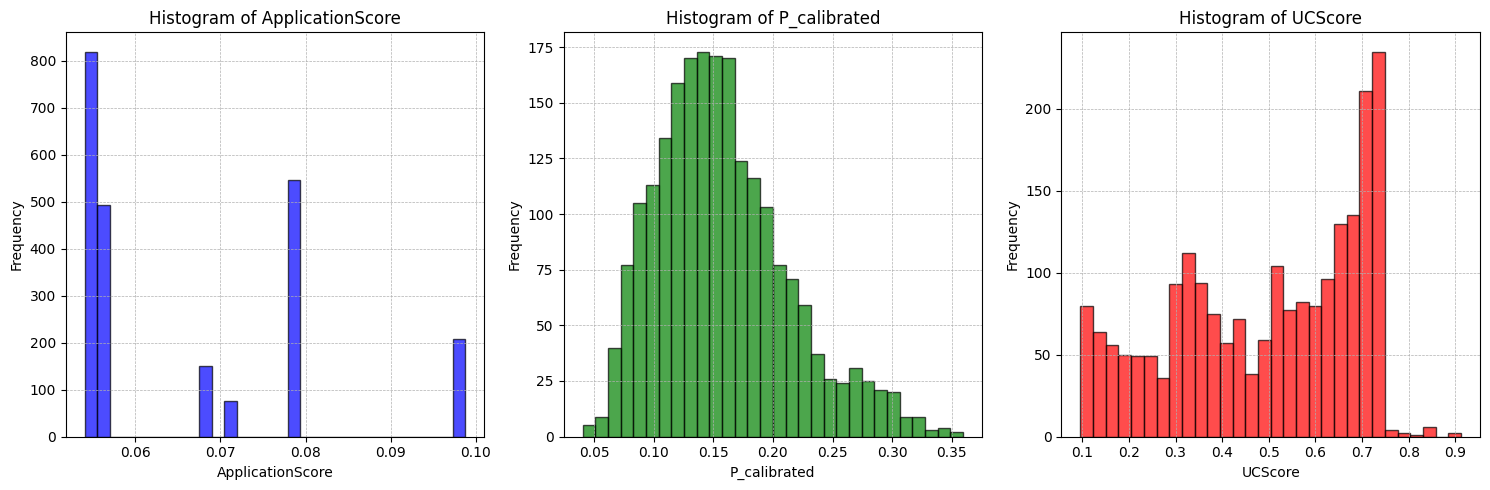

In [41]:
import matplotlib.pyplot as plt
import numpy as np

def plotFeatureHist(df, feature1, feature2, feature3):
    # Create a figure and axis
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

    # Plot histograms for feature1
    axs[0].hist(df[feature1], bins=30, edgecolor='k', alpha=0.7, color='blue', density=False)
    axs[0].set_title(f'Histogram of {feature1}')
    axs[0].set_xlabel(f'{feature1}')
    axs[0].set_ylabel('Frequency')
    axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)

    # Plot histograms for feature2
    axs[1].hist(df[feature2], bins=30, edgecolor='k', alpha=0.7, color='green', density=False)
    axs[1].set_title(f'Histogram of {feature2}')
    axs[1].set_xlabel(f'{feature2}')
    axs[1].set_ylabel('Frequency')
    axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

    # Plot histograms for feature3
    axs[2].hist(df[feature3], bins=30, edgecolor='k', alpha=0.7, color='red', density=False)
    axs[2].set_title(f'Histogram of {feature3}')
    axs[2].set_xlabel(f'{feature3}')
    axs[2].set_ylabel('Frequency')
    axs[2].grid(True, which='both', linestyle='--', linewidth=0.5)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage (assuming you have a DataFrame 'df' with these features)
plotFeatureHist(pd_, 'ApplicationScore', 'P_calibrated', 'UCScore')


In [ ]:
# Assuming df is a derived DataFrame
df = df.copy()

# Starting with a base score for all rows
df.loc[:, 'score'] = -4.2059

# Adjust score based on UCScore
df.loc[df['UCScore'] < 10, 'score'] += 0
df.loc[(df['UCScore'] >= 10) & (df['UCScore'] < 30), 'score'] += 0.9958
df.loc[(df['UCScore'] >= 30) & (df['UCScore'] < 50), 'score'] += 1.2435
df.loc[df['UCScore'] >= 50, 'score'] += 1.6464

# Adjust score based on MaritalStatus
df.loc[~df['MaritalStatus'].isin(['PARTNER','MARRIED']), 'score'] += 0.3482

# Adjust score based on Age
df.loc[df['age'] < 25, 'score'] += 0
df.loc[(df['age'] >= 25) & (df['age'] < 39), 'score'] += -0.2473
df.loc[df['age'] >= 39, 'score'] += -0.7944

df['old_model'] = (np.exp(df['score']) / (1 + np.exp(df['score']))) * 100  #) /10


In [42]:
pd_[pd_.Probability_Bins == 2 ]

,SSN,UCScore,UtilizationRatio,Amount,MaritalStatus,EmploymentIncome,ReceivedDate,AccountNumber,PaymentRemarks,IndebtednessRatio,ApplicationScore,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,Inquiries12M,BirthDate,Applicationtype,PropertyVolume,age,Z,P,Z_calibrated,P_calibrated,Probability_Bins,YearMonth
4186,35E6837B1DA855871255DAB243212C2017A35A14AFCD92...,0.156,NaN,30000.0,SINGLE,218,2023-08-05,8775982,1,NaN,0.054069,0.0,0.0,1.0,1998-12-05,0,0,24,-0.305074,0.424318,-2.737278,0.060809,2.0,2023-08
5393,AF6A50C0E0EB8FF246F0018E2212B477839C4A6E74BFB6...,0.111,0.00,100000.0,SINGLE,308,2023-08-02,8773167,1,0.0000,0.054069,0.0,0.0,4.0,2000-04-10,0,0,23,-0.273130,0.432139,-2.707619,0.062525,2.0,2023-08
27180,2A9CDD4F4D1265952DF0E98DC575A1C1407EA20EEFE89D...,0.599,102.73,200000.0,PARTNER,286,2023-10-18,8857169,1,0.2158,0.056958,3724500.0,0.0,2.0,1986-10-21,0,3724500,37,-0.386580,0.404541,-2.812272,0.056665,2.0,2023-10
1567,0B8277766EC8DC37AA37FA405EE04A5179CE1776744F0F...,0.300,94.03,150000.0,None,479,2023-01-31,8556213,0,1.4491,0.054090,0.0,0.0,15.0,1964-01-24,1,0,59,-0.274478,0.431808,-2.708874,0.062452,2.0,2023-01
1894,AE7B6857111D4805D35EDA6E6492254F3FBC02D588BFC8...,0.517,18.05,100000.0,None,518,2023-02-27,8587791,1,0.6233,0.078812,182003.0,0.0,5.0,1960-06-06,1,182003,63,-0.295557,0.426644,-2.728456,0.061315,2.0,2023-02
2482,1023D6F00EC5C34FAB77DBD353656186F88AD96156C495...,0.211,100.00,450000.0,SINGLE,127,2023-04-03,8628984,0,0.2521,0.054069,0.0,0.0,26.0,1959-01-25,1,0,64,-0.185954,0.453645,-2.626067,0.067479,2.0,2023-04
3040,2A967503C6274184FC420E53CC81B4701EDA57DBAF00A4...,0.131,NaN,400000.0,None,101,2023-02-13,8572342,0,0.1115,0.054069,0.0,0.0,5.0,2001-06-07,1,0,22,-0.177688,0.455695,-2.618296,0.067970,2.0,2023-02
5516,6A2BF4E55388F4DAD560B91BD70921987A261FC4B7A86E...,0.186,98.45,60000.0,NULL,356,2023-04-26,8656691,0,3.2198,0.054069,0.0,0.0,12.0,1972-06-29,1,0,51,-0.438639,0.392065,-2.859579,0.054188,2.0,2023-04
7718,D966FD1A30DED99CFB32CC2F773D5A281DC2EC83114D74...,0.167,91.51,30000.0,None,345,2023-06-16,8718169,0,1.0771,0.054069,0.0,0.0,9.0,1983-02-15,1,0,40,-0.347605,0.413963,-2.776542,0.058605,2.0,2023-06
7926,F01CA2A334FAEC3D556C7EEEAA895B84F9E3EF063C2921...,0.096,NaN,30000.0,SINGLE,None,2023-06-03,8702924,0,NaN,0.054069,0.0,0.0,5.0,2001-08-30,1,0,22,-0.248460,0.438203,-2.684626,0.063887,2.0,2023-06


In [44]:
pd_[pd_.AccountNumber ==  '8718169']

,SSN,UCScore,UtilizationRatio,Amount,MaritalStatus,EmploymentIncome,ReceivedDate,AccountNumber,PaymentRemarks,IndebtednessRatio,ApplicationScore,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,Inquiries12M,BirthDate,Applicationtype,PropertyVolume,age,Z,P,Z_calibrated,P_calibrated,Probability_Bins,YearMonth
7718,D966FD1A30DED99CFB32CC2F773D5A281DC2EC83114D74...,0.167,91.51,30000.0,None,345,2023-06-16,8718169,0,1.0771,0.054069,0.0,0.0,9.0,1983-02-15,1,0,40,-0.347605,0.413963,-2.776542,0.058605,2.0,2023-06


In [83]:
pd_.Applicationtype.value_counts()

Applicationtype
0    2013
1     208
2      35
Name: count, dtype: int64

In [84]:
pd_

,SSN,UCScore,UtilizationRatio,Amount,MaritalStatus,EmploymentIncome,ReceivedDate,AccountNumber,PaymentRemarks,IndebtednessRatio,ApplicationScore,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,Inquiries12M,BirthDate,Applicationtype,PropertyVolume,age,Z,P,Z_calibrated,P_calibrated,Probability_Bins,YearMonth
122,1E4D4711002D2E0A597174CA74A0C19C29D05EE132400A...,0.598,NaN,30000.0,SINGLE,323,2023-08-03,7943251,1,NaN,0.078812,0.0,0.0,4.0,1995-10-06,0,0,28,0.606455,0.647132,-1.892363,0.130975,4.0,2023-08
821,70204B34029FB6204AB88798B37A207B30147F4557E0DC...,0.611,NaN,200000.0,DIVORCED,464,2023-09-08,7958234,1,0.0000,0.078812,1143170.0,0.0,19.0,1987-12-12,0,1143170,35,0.768575,0.683212,-1.755543,0.147349,5.0,2023-09
1279,AC3D7C6670E9D954510DE4975EADAF07E996AACBB86D6B...,0.392,99.31,200000.0,SINGLE,757,2023-09-02,7954746,0,1.4531,0.054090,0.0,0.0,28.0,1990-01-30,0,0,33,0.899985,0.710946,-1.650376,0.161058,5.0,2023-09
1380,39C13530C5FE09FAC1FEFEE801A4CAEC8B4CB54FC4682A...,0.621,NaN,40000.0,SINGLE,318,2023-09-24,7963002,1,NaN,0.098740,0.0,0.0,9.0,2001-07-10,0,0,22,0.948999,0.720914,-1.612580,0.166231,5.0,2023-09
1381,39C13530C5FE09FAC1FEFEE801A4CAEC8B4CB54FC4682A...,0.573,NaN,40000.0,SINGLE,318,2023-09-24,7963002,1,NaN,0.098740,0.0,0.0,8.0,2001-07-10,0,0,22,0.817971,0.693805,-1.715375,0.152468,5.0,2023-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15034,266A8B996B538A22B583796D8F8E59822DFD8C2991005F...,0.551,97.92,300000.0,PARTNER,463,2023-08-21,8792909,1,1.7031,0.056958,337194.0,0.0,41.0,1984-11-05,0,337194,38,1.491120,0.816246,-1.251077,0.222514,5.0,2023-08
38642,B3E6A27AC679BCD9A002594C7224D63A5AAE6A7A400273...,0.379,84.74,250000.0,SINGLE,409,2023-08-30,8804481,0,0.4239,0.054090,0.0,244500.0,21.0,1998-01-19,0,244500,25,0.755744,0.680429,-1.766098,0.146028,5.0,2023-08
27055,6365AFBEB9C0933F5A5E595B748688F99A95C8472D2AD8...,0.111,NaN,40000.0,SINGLE,138,2023-08-10,8782037,0,NaN,0.054069,0.0,0.0,12.0,1999-01-05,0,0,24,-0.022416,0.494396,-2.471538,0.077878,3.0,2023-08
17282,04EC970CCFAB1DA4F3E3EE39585005C0342491991543C9...,0.350,54.84,350000.0,SINGLE,351,2023-09-11,8818739,1,0.6594,0.068230,0.0,0.0,13.0,1999-06-15,0,0,24,0.494826,0.621243,-1.990534,0.120200,4.0,2023-09


In [85]:
print(min(pd_.ReceivedDate))
print(max(pd_.ReceivedDate))

2022-08-16 00:00:00
2023-10-30 00:00:00


In [86]:

def getstats(df):    
    stats = {}
    
    stats["SumAmount < 220000"] = np.sum(df[df.Amount < 220000].Amount)
    #stats["StartupFeeSum < 220000"] = sum(df[df.Amount < 220000].StartupFee)
    
    stats["Count < 220000"] = len(df[df.Amount < 220000].Amount)
    
    #stats["StartupFeeSum > 220000"] = sum(df[df.Amount > 220000].StartupFee)

    stats["SumAmount > 220000"] = np.sum(df[df.Amount > 220000].Amount)
    stats["Count > 220000"] = len(df[df.Amount > 220000].Amount)

    # Calculate proportion of "Ever90" values that are 1 for Amount < 220000
    #stats["Ever90 proportion < 220000"] = len(df[(df.Ever90 == 1) & (df.Amount < 220000)]) / len(df[df.Amount < 220000])

    # Calculate proportion of "Ever90" values that are 1 for Amount > 220000
    #stats["Ever90 proportion > 220000"] = len(df[(df.Ever90 == 1) & (df.Amount > 220000)]) / len(df[df.Amount > 220000])

    return pd.Series(stats)



df = pd.DataFrame(pd_)
df['Applicationtype']   = np.where(df['Applicationtype'] == 0 , 0 ,1)


# Groupby and apply
result = df.groupby(['Probability_Bins', 'Applicationtype']).apply(getstats)

# Rename Applicationtype for clarity
#result.index.set_levels(['Main' if i == 0 else 'Co' for i in result.index.get_level_values(1)], level=1, inplace=True) 


result


SumAmount < 220000  Count < 220000  \
Probability_Bins Applicationtype                                       
1.0              0                           80000.0             1.0   
                 1                          250000.0             3.0   
2.0              0                         1305000.0            11.0   
                 1                          871000.0             9.0   
3.0              0                        14183000.0           136.0   
                 1                         2211001.0            18.0   
4.0              0                        45333000.0           415.0   
                 1                         4468000.0            44.0   
5.0              0                       117753501.0          1076.0   
                 1                         5502000.0            58.0   

                                  SumAmount > 220000  Count > 220000  
Probability_Bins Applicationtype                                      
1.0              0                          300000.0             1.0  
                 1                          300000.0             1.0  
2.0              0                          776500.0             3.0  
                 1                         1100000.0             3.0  
3.0              0                         8340000.0            24.0  
                 1                         5461000.0            17.0  
4.0              0                        21289000.0            62.0  
                 1                         8191000.0            24.0  
5.0              0                        31334000.0            94.0  
                 1                        16344000.0            48.0

In [87]:
file_name = "Distribution.xlsx"
result.to_excel(file_name, engine='openpyxl', index=False)

In [88]:
df[df.ReceivedDate >='2023-08-01']

,SSN,UCScore,UtilizationRatio,Amount,MaritalStatus,EmploymentIncome,ReceivedDate,AccountNumber,PaymentRemarks,IndebtednessRatio,ApplicationScore,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,Inquiries12M,BirthDate,Applicationtype,PropertyVolume,age,Z,P,Z_calibrated,P_calibrated,Probability_Bins,YearMonth
122,1E4D4711002D2E0A597174CA74A0C19C29D05EE132400A...,0.598,NaN,30000.0,SINGLE,323,2023-08-03,7943251,1,NaN,0.078812,0.0,0.0,4.0,1995-10-06,0,0,28,0.606455,0.647132,-1.892363,0.130975,4.0,2023-08
821,70204B34029FB6204AB88798B37A207B30147F4557E0DC...,0.611,NaN,200000.0,DIVORCED,464,2023-09-08,7958234,1,0.0000,0.078812,1143170.0,0.0,19.0,1987-12-12,0,1143170,35,0.768575,0.683212,-1.755543,0.147349,5.0,2023-09
1279,AC3D7C6670E9D954510DE4975EADAF07E996AACBB86D6B...,0.392,99.31,200000.0,SINGLE,757,2023-09-02,7954746,0,1.4531,0.054090,0.0,0.0,28.0,1990-01-30,0,0,33,0.899985,0.710946,-1.650376,0.161058,5.0,2023-09
1380,39C13530C5FE09FAC1FEFEE801A4CAEC8B4CB54FC4682A...,0.621,NaN,40000.0,SINGLE,318,2023-09-24,7963002,1,NaN,0.098740,0.0,0.0,9.0,2001-07-10,0,0,22,0.948999,0.720914,-1.612580,0.166231,5.0,2023-09
1381,39C13530C5FE09FAC1FEFEE801A4CAEC8B4CB54FC4682A...,0.573,NaN,40000.0,SINGLE,318,2023-09-24,7963002,1,NaN,0.098740,0.0,0.0,8.0,2001-07-10,0,0,22,0.817971,0.693805,-1.715375,0.152468,5.0,2023-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15034,266A8B996B538A22B583796D8F8E59822DFD8C2991005F...,0.551,97.92,300000.0,PARTNER,463,2023-08-21,8792909,1,1.7031,0.056958,337194.0,0.0,41.0,1984-11-05,0,337194,38,1.491120,0.816246,-1.251077,0.222514,5.0,2023-08
38642,B3E6A27AC679BCD9A002594C7224D63A5AAE6A7A400273...,0.379,84.74,250000.0,SINGLE,409,2023-08-30,8804481,0,0.4239,0.054090,0.0,244500.0,21.0,1998-01-19,0,244500,25,0.755744,0.680429,-1.766098,0.146028,5.0,2023-08
27055,6365AFBEB9C0933F5A5E595B748688F99A95C8472D2AD8...,0.111,NaN,40000.0,SINGLE,138,2023-08-10,8782037,0,NaN,0.054069,0.0,0.0,12.0,1999-01-05,0,0,24,-0.022416,0.494396,-2.471538,0.077878,3.0,2023-08
17282,04EC970CCFAB1DA4F3E3EE39585005C0342491991543C9...,0.350,54.84,350000.0,SINGLE,351,2023-09-11,8818739,1,0.6594,0.068230,0.0,0.0,13.0,1999-06-15,0,0,24,0.494826,0.621243,-1.990534,0.120200,4.0,2023-09


In [89]:

df


result = df.groupby('Probability_Bins')['Amount'].count().reset_index()

result['Count'] = result['Amount']

In [90]:
amount = df.groupby('Probability_Bins')['Amount'].sum().reset_index()
result['Amount'] = amount.Amount
result

,Probability_Bins,Amount,Count
0,1.0,930000.0,6
1,2.0,4052500.0,26
2,3.0,30635001.0,197
3,4.0,79941000.0,548
4,5.0,171373501.0,1278


In [92]:
file_name = "Distribution.xlsx"
result.to_excel(file_name, engine='openpyxl', index=False)


In [67]:
RF.BrokerName

1687     None
1705     None
1718     None
1900     None
2028     None
         ... 
13594    None
13596    None
13628    None
13659    None
13897    None
Name: BrokerName, Length: 1090, dtype: object

In [68]:
RF[RF.U_applicationid == '8787680'].BrokerName

Series([], Name: BrokerName, dtype: object)

In [347]:

AP[AP['reasoncodes'].str.contains('INK', na=False)]


,U_applicationid,create_date,reasoncodes,sysdecgrpstd,systemdecstd,reasondescriptions,reasoncode1,reasondescription1,reasoncode2,reasondescription2,reasoncode3,reasondescription3,reasoncode4,reasondescription4,reasoncode5,reasondescription5,calculatedriskscore,calculatedpricesensivityindex,debttoincomeratio,kalpvalue,approvedloanamount,approvedloanterm,interestrate,interestrategroup,setupfee,pdscorenewcustomer,scoreversionnewcustomer,RowNumber,AccountNumber,ApplicationID,SSN_A,IsMainApplicant,HasCoapp,ApplicationScore,ReceivedDate,DisbursedDate,Amount,PaymentRemarks,CreditOfficer,SalesChannel,Product,Migrated,BrokerName,OriginalSalesChannel,BirthDate,Bookingtype,MaritalStatus,EmploymentType,HousingType,MonthlySalary,Referer,Campaign,SourceMedium,Keyword,NystartChannel,PNReceivedDate,NumberOfApplicants,Gender,CoappSameAddress,Kronofogden,CreditCardsNo,InstallmentLoansNo,UnsecuredLoansNo,LastPaymentRemarkDate1,TotalLoans,NystartBalance,TotalUnsecuredLoans,SSN,Inquiries12M,UCScore,IncomeYear,ActiveBusinessIncome,PassiveBusinessIncome,EmploymentIncome,CapitalIncome,CapitalDeficit,GeneralDeductions,ActiveBusinessDeficit,TotalIncome,IncomeYear2,ActiveBusinessIncome2,PassiveBusinessIncome2,EmploymentIncome2,CapitalIncome2,CapitalDeficit2,GeneralDeductions2,ActiveBusinessDeficit2,TotalIncome2,IncomeBeforeTax,IncomeBeforeTaxPrev,IncomeFromCapital,DeficitFromCapital,IncomeFromOwnBusiness,PaymentRemarksNo,PaymentRemarksAmount,LastPaymentRemarkDate,KFMPublicClaimsAmount,KFMPrivateClaimsAmount,KFMTotalAmount,KFMPublicClaimsNo,KFMPrivateClaimsNo,HouseTaxValue,HouseOwnershipPct,HouseOwnershipStatus,HouseOwnershipNo,BusinessInquiries,CreditCardsUtilizationRatio,HasMortgageLoan,HasCard,HasUnsecuredLoan,HasInstallmentLoan,IndebtednessRatio,AvgIndebtednessRatio12M,ActiveCreditAccounts,NewUnsecuredLoans12M,NewInstallmentLoans12M,NewCreditAccounts12M,NewMortgageLoans12M,TotalNewExMortgage12M,VolumeChange12MExMortgage,VolumeChange12MUnsecuredLoans,VolumeChange12MInstallmentLoans,VolumeChange12MCreditAccounts,VolumeChange12MMortgageLoans,AvgUtilizationRatio12M,VolumeUsed,NumberOfAccounts,NumberOfLenders,ApprovedCreditVolume,InstallmentLoansVolume,CreditAccountsVolume,UnsecuredLoansVolume,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,NumberOfCredits,NumberOfCreditors,ApprovedCardsLimit,NumberOfCreditCards,NumberOfBlancoLoans,SharedVolumeExMortgage,SharedVolume,NumberOfUnsecuredLoans,SharedVolumeUnsecuredLoans,NumberOfInstallmentLoans,SharedVolumeInstallmentLoans,NumberOfCreditAccounts,SharedVolumeCrerditAccounts,UtilizationRatio,CreditAccountOverdraft,NumberOfMortgageLoans,SharedVolumeMortgageLoans,SharedVolumeCreditCards,Applicationtype,jsonID,Date,import_key,SSN2,CountyCode,MunicipalityCode,PostalCode,GuardianAppointed,BlockCode,BlockCodeDate,CivilStatus,CivilStatusDate,TimeOnAddress,AddressType,Country,RowNum
12,8772830,2023-08-02 16:00:16.357,{INK},AP,ACC,"{""Sökandes uppgivna inkomst mer än 120 % av UC...",INK,Sökandes uppgivna inkomst mer än 120 % av UC i...,None,None,None,None,None,None,None,None,7,8,0,5320,30000,96,22.65,E,1995,3.88,PDscore_Newcustomer01,1.0,7942857,8772830,FD4CC116BDC56CC554907A307D1EEBE602AD426A9CB5B0...,1,0,3.880232,2023-08-02,None,30000.0,1,Radin,WEB,Nystartlånet,0,None,WEB,1992-12-18,,PARTNER,FULL,RENTED,27005.0,None,Missing,Missing,Missing,Undefined,None,1,Male,None,0.0,NaN,NaN,NaN,2022-11-14,0.0,NaN,0.0,FD4CC116BDC56CC554907A307D1EEBE602AD426A9CB5B0...,8,0.412,2022,None,None,246,None,8,None,None,238,2021,None,None,55,None,8,None,None,48,237800.0,47600.0,NaN,8100.0,0.0,3,3022,2022-11-14,None,None,None,None,None,None,None,None,None,0,None,None,0.0,0.0,0.0,NaN,NaN,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,0,0,None,0,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,NaN,None,None,None,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,8779051,2023-08-08 14:48:18.077,{INK},AP,ACC,"{""Sökandes uppgivna inkomst mer än 120 % av UC...",INK,Sökande

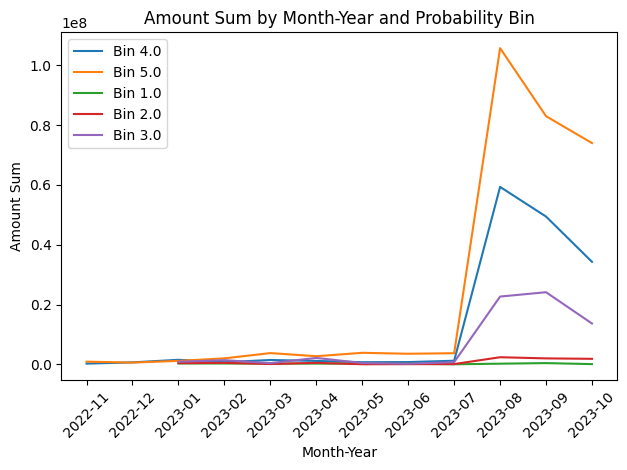

In [348]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data setup
# df = pd.DataFrame(pd_)

# Extract year and month from 'ReceivedDate'
df['YearMonth'] = df['ReceivedDate'].dt.to_period('M')

# Group by 'YearMonth' and 'Probability_Bins', then sum 'Amount'
result = df.groupby(['YearMonth', 'Probability_Bins'])['Amount'].sum().reset_index()

# Plotting
for bin in result['Probability_Bins'].unique():
    subset = result[result['Probability_Bins'] == bin]
    plt.plot(subset['YearMonth'].astype(str), subset['Amount'], label=f"Bin {bin}")

plt.title("Amount Sum by Month-Year and Probability Bin")
plt.xlabel("Month-Year")
plt.ylabel("Amount Sum")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust plot layout for better visibility
plt.show()


In [349]:
pd_

,SSN,UCScore,UtilizationRatio,Amount,MaritalStatus,ReceivedDate,AccountNumber,PaymentRemarks,IndebtednessRatio,ApplicationScore,MortgageLoansHouseVolume,MortgageLoansApartmentVolume,Inquiries12M,BirthDate,Applicationtype,PropertyVolume,age,Z,P,Z_calibrated,P_calibrated,Probability_Bins,YearMonth
140,1E4D4711002D2E0A597174CA74A0C19C29D05EE132400A...,0.598,NaN,30000.0,SINGLE,2023-08-03,7943251,1,NaN,0.078812,0.0,0.0,4.0,1995-10-06,0,0,28,0.606455,0.647132,-1.892363,0.130975,4.0,2023-08
860,AC3D7C6670E9D954510DE4975EADAF07E996AACBB86D6B...,0.392,99.31,200000.0,SINGLE,2023-09-02,7954746,0,1.4531,0.054090,0.0,0.0,28.0,1990-01-30,0,0,33,0.899985,0.710946,-1.650376,0.161058,5.0,2023-09
1441,70204B34029FB6204AB88798B37A207B30147F4557E0DC...,0.611,NaN,200000.0,DIVORCED,2023-09-08,7958234,1,0.0000,0.078812,1143170.0,0.0,19.0,1987-12-12,0,1143170,35,0.768575,0.683212,-1.755543,0.147349,5.0,2023-09
1906,5FECEEE3903EA6A632287236ED24EF424AB0F6511230EA...,0.723,NaN,30000.0,SINGLE,2023-08-01,8770387,1,0.0000,0.078812,0.0,0.0,5.0,1998-03-21,0,0,25,0.956279,0.722376,-1.607034,0.167001,5.0,2023-08
1923,AE3F3FFD19A42B35E22E8E2ECCD8E968DF492D1591465F...,0.592,NaN,30000.0,PARTNER,2023-08-01,8770334,1,0.0041,0.071791,0.0,0.0,21.0,1999-04-15,0,0,24,1.255913,0.778322,-1.394888,0.198629,5.0,2023-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13035,EB2D7EE2041FF459415963E10F940BB6B3F2B42FEE9628...,0.104,93.79,200000.0,SINGLE,2023-10-22,8860505,0,1.3510,0.054069,0.0,0.0,5.0,2001-12-25,1,0,21,-0.211251,0.447383,-2.649814,0.066000,2.0,2023-10
13170,820600FB495FF148826B1049967EEA0F25E7C50AD2619B...,0.578,NaN,275000.0,SINGLE,2023-09-13,8821162,1,NaN,0.098740,0.0,0.0,14.0,1999-06-05,1,0,24,0.989826,0.729054,-1.581713,0.170553,5.0,2023-09
13281,38B0284066D57873BD0886BCFA763E56BFE7198F73FDAC...,0.526,79.42,500000.0,SINGLE,2023-07-06,8744005,0,0.7004,0.078812,0.0,0.0,37.0,1991-05-30,2,0,32,1.497689,0.817229,-1.247349,0.223159,5.0,2023-07
13359,33A92EE69B61A0BF2270A8D9D38F21BAFE25F0C2A8F5C0...,0.692,NaN,450000.0,PARTNER,2023-06-20,8722270,1,NaN,0.056958,0.0,0.0,7.0,1985-08-19,2,0,38,0.688109,0.665546,-1.822535,0.139130,5.0,2023-06
